# Data Science Final Generic Assignment

In [116]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split as split

import time
from sklearn.metrics import accuracy_score
# KNNs
from sklearn.neighbors import KNeighborsClassifier as KNNC
from sklearn.neighbors import KNeighborsRegressor as KNNR
# NaiveBayes
from sklearn.naive_bayes import GaussianNB as NB
# Tree
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import DecisionTreeRegressor as DTR
# Tree plot
from sklearn.tree import plot_tree
# Random Forest
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import RandomForestRegressor as RFR
# Logisitic/Linear Regression
from sklearn.linear_model import LogisticRegression as LC
from sklearn.linear_model import LinearRegression as LR

#Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Code For Analysis

In [62]:
def getModelDetails(X_train, y_train, X_test, y_test, model, metric, **args):
    st = time.time()
    y_pred = model().fit(X_train, y_train).predict(X_test)
    rTime = time.time() - st
    return (metric(y_test, y_pred), rTime)

def getModelTimeAndAccuracies(models, score, X_train, y_train, X_test, y_test, learning = "C"):
    results = []
    for model in models:
        results.append(
            getModelDetails(
                X_train, y_train, X_test, y_test,
                eval(model["name"] + learning if model["name"] != "NB" else model["name"]),
                score,
                **model["params"]
            )
        )
    return results

## Code for Results display

In [82]:
def printResults(results, models):
    for result, model in zip(results, models):
        print("{}: {:0.2f}%, {:0.4f}s".format(model["name"], result[0]*100, result[1]))

## SKIN Segmentation Dataset

In [106]:
df = pd.read_csv('./DSFA/Skin Segmentation/Skin_NonSkin.txt', sep='\t')

In [107]:
df.columns = ["R", "G", "B", "label"]

In [108]:
df.head()

,R,G,B,label
0,73,84,122,1
1,72,83,121,1
2,70,81,119,1
3,70,81,119,1
4,69,80,118,1


In [109]:
X = df.iloc[:,:-1]

In [110]:
y = df.iloc[:,-1]

In [111]:
X = X/(X.max()-X.min())

In [112]:
y

0         1
1         1
2         1
3         1
4         1
         ..
245051    2
245052    2
245053    2
245054    2
245055    2
Name: label, Length: 245056, dtype: int64

In [113]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.2, random_state=42)

In [114]:
score = accuracy_score
models = [
        {"name": "KNN", "params": {"n_jobs": -1, "random_state": 42}},
        {"name": "NB", "params": {"random_state": 42}},
        {"name": "DT", "params": {"random_state": 42}},
        {"name": "RF", "params": {"n_estimators": 20, "random_state": 42}}
]
results = getModelTimeAndAccuracies(
    models,
    score,
    X_train, y_train, X_test, y_test)

### RESULT

In [115]:
printResults(results, models)

KNN: 99.95%, 1.3447s
NB: 92.50%, 0.0210s
DT: 99.94%, 0.1460s
RF: 99.96%, 5.4617s


### Clustering

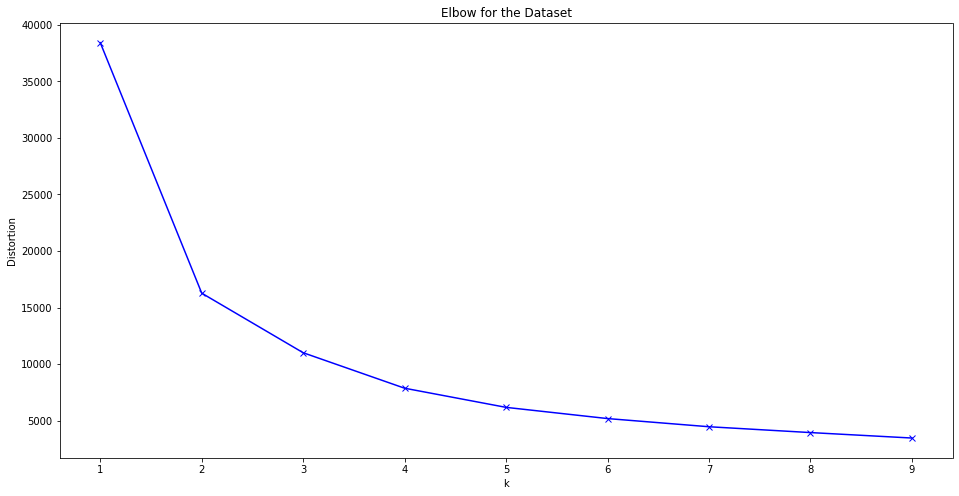

In [117]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train)
    distortions.append(kmeanModel.inertia_)

def savePlt(plot, name):
    plot.savefig(f'./DSFA/{name}.png',bbox_inches='tight')

plt.figure(figsize=(16,8))
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow for the Dataset')
plt.plot(K, distortions, 'bx-')
savePlt(plt, "skinElbow")

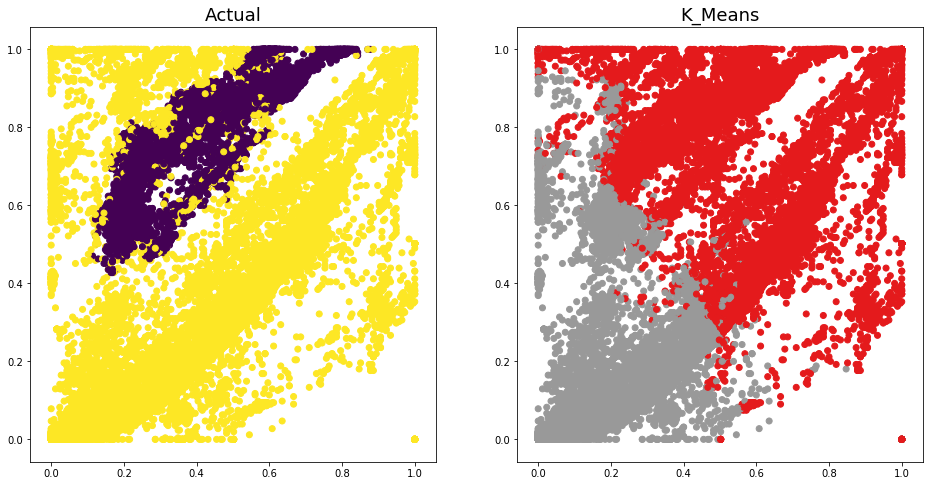

In [122]:
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(X_train)

k_means=kmeanModel.predict(X_test)
target=y_test
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X_test.loc[:,"R"], X_test.loc[:,"B"], c=target)
axes[1].scatter(X_test.loc[:,"R"], X_test.loc[:,"B"], c=k_means, cmap=plt.cm.Set1)
# axes[1].scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=target, cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

savePlt(plt, "skinKMeans")

## BikeSharing Dataset

In [84]:
df = pd.read_csv("./DSFA/Bike-Sharing-Dataset/day.csv")

In [85]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [86]:
dateyr=df["dteday"].apply(lambda x: int(x.split("-")[0]))

In [87]:
datemo=df["dteday"].apply(lambda x: int(x.split("-")[1]))

In [88]:
dateday=df["dteday"].apply(lambda x: int(x.split("-")[2]))

In [89]:
df.insert(2, "dateyr", dateyr)
df.insert(3, "datemo", datemo)
df.insert(4, "dateday", dateday)

In [90]:
df = df.drop(columns=["dteday"])

In [91]:
df.head()

,instant,dateyr,datemo,dateday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011,1,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011,1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011,1,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011,1,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011,1,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [92]:
X_train, X_test, y_train, y_test = split(df.iloc[:, :-1], df.iloc[:,-1], test_size=0.33, random_state=42)

In [93]:
from sklearn.metrics import r2_score

In [94]:
score = r2_score 
models = [
        {"name": "KNN", "params": {"n_jobs": -1, "random_state": 42}},
        {"name": "NB", "params": {"random_state": 42}},
        {"name": "DT", "params": {"random_state": 42}},
        {"name": "L", "params": {"n_jobs": -1, "random_state": 42}},
        {"name": "RF", "params": {"n_estimators": 20, "random_state": 42}}
]
results = getModelTimeAndAccuracies(
    models,
    score,
    X_train, y_train, X_test, y_test, "R")

### RESULT

In [96]:
printResults(results, models)

KNN: 99.77%, 0.0054s
NB: 48.68%, 0.0369s
DT: 98.80%, 0.0040s
L: 100.00%, 0.0617s
RF: 99.59%, 0.2147s


### Clustering

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train)
    distortions.append(kmeanModel.inertia_)

def savePlt(plot, name):
    plot.savefig(f'./DSFA/{name}.png',bbox_inches='tight')

plt.figure(figsize=(16,8))
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow for the Dataset')
plt.plot(K, distortions, 'bx-')
savePlt(plt, "bikeElbow")

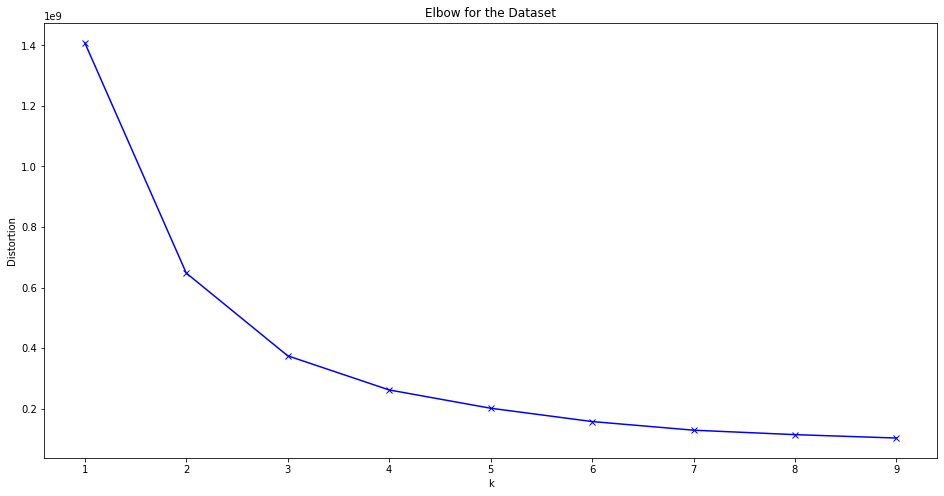

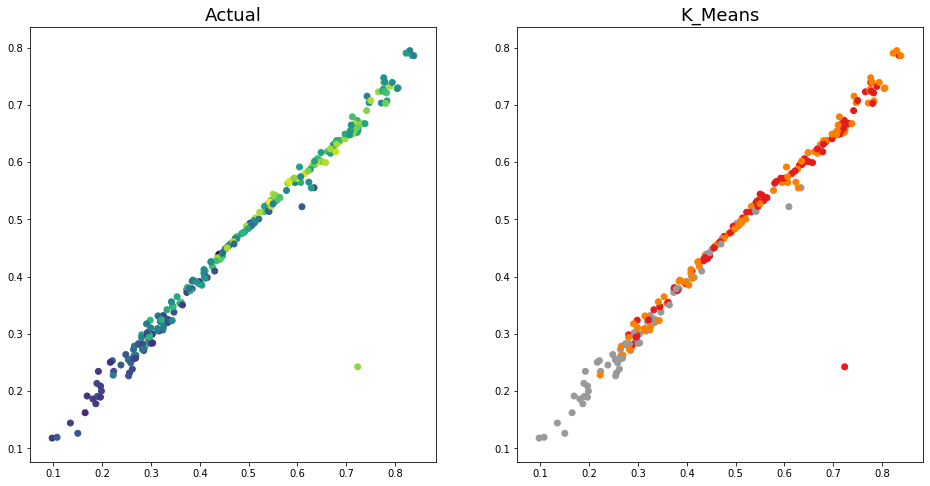

In [105]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X_train)

k_means=kmeanModel.predict(X_test)
target=y_test
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X_test.loc[:,"temp"], X_test.loc[:,"atemp"], c=target)
axes[1].scatter(X_test.loc[:,"temp"], X_test.loc[:,"atemp"], c=k_means, cmap=plt.cm.Set1)
# axes[1].scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=target, cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

savePlt(plt, "bikeKMeans")